# 五線譜

In [1]:
from finlab.data import Data
import pandas as pd
import datetime
data = Data()

days = 750
data.date = datetime.date(2018,1,1)
c = data.get('收盤價', 10000000000)

# 計算五條線跟斜率

In [2]:

y = c.iloc[-days:]
x = pd.Series(list(range(days)), index=y.index)
midy = y.mean(axis=0)
midx = days/2

beta = (y - midy).mul(x - midx, axis=0).sum()/((x-midx)**2).sum()
alpha = midy - midx * beta


# 計算中線跟標準差
X = pd.DataFrame({k: x for k in y.columns})
mid_line = ((X * beta + alpha))
std = (y - mid_line).std()


In [3]:
cond = y.iloc[-1] < mid_line.iloc[-1] - 2*std
cond[cond]

stock_id
00673R    True
00710B    True
00716R    True
00717     True
1416      True
1527      True
1709      True
2383      True
4438      True
6239      True
911622    True
dtype: bool

# 畫圖

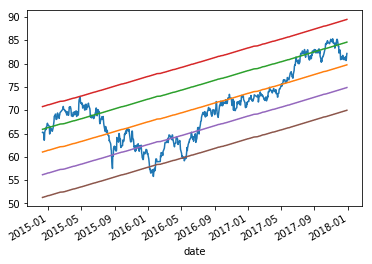

In [4]:
%matplotlib inline

def plot_rainbow(s):
    y[s].plot()

    mid_line[s].plot()

    (mid_line[s] + std[s]).plot()
    (mid_line[s] + 2*std[s]).plot()

    (mid_line[s] - std[s]).plot()
    (mid_line[s] - 2*std[s]).plot()
    
plot_rainbow('0050')

# 選股

In [5]:
# 小於下方一條線的股票
condition = c.iloc[-1] < mid_line.iloc[-1] - 2*std
condition[condition]

stock_id
00673R    True
00710B    True
00716R    True
00717     True
1416      True
1527      True
1709      True
2383      True
4438      True
6239      True
911622    True
dtype: bool

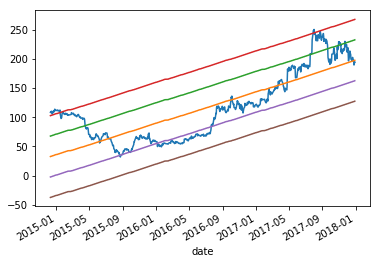

In [6]:
plot_rainbow('2439')

2008-01-01 - 2008-09-07 報酬率: -26.56 % nstock 33
2008-09-07 - 2009-05-15 報酬率: -1.60 % nstock 2
2009-05-15 - 2010-01-20 報酬率: 0.00 % nstock 0


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2010-01-20 - 2010-09-27 報酬率: 0.00 % nstock 0
2010-09-27 - 2011-06-04 報酬率: -25.31 % nstock 1
2011-06-04 - 2012-02-09 報酬率: 0.00 % nstock 0
2012-02-09 - 2012-10-16 報酬率: -8.38 % nstock 5
2012-10-16 - 2013-06-23 報酬率: 0.00 % nstock 0
2013-06-23 - 2014-02-28 報酬率: 0.00 % nstock 0
2014-02-28 - 2014-11-05 報酬率: 7.16 % nstock 3
2014-11-05 - 2015-07-13 報酬率: -5.16 % nstock 35
2015-07-13 - 2016-03-19 報酬率: 8.99 % nstock 25
2016-03-19 - 2016-11-24 報酬率: 20.10 % nstock 2
2016-11-24 - 2017-08-01 報酬率: -5.22 % nstock 3
2017-08-01 - 2018-04-08 報酬率: 0.00 % nstock 0
每次換手最大報酬 : 20.10 ％
每次換手最少報酬 : -26.56 ％


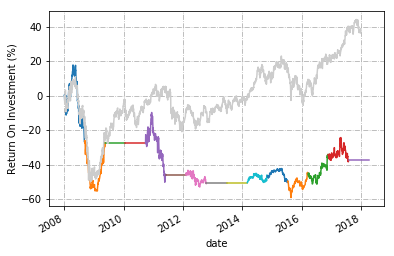

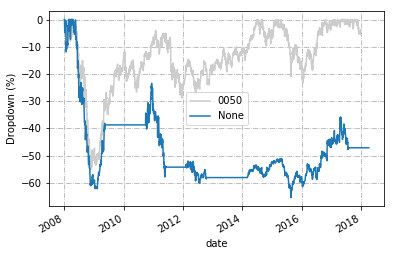

(2008-01-03    1.000000
 2008-01-04    1.005465
 2008-01-07    0.960891
 2008-01-08    0.957155
 2008-01-09    0.957291
 2008-01-10    0.960644
 2008-01-11    0.966893
 2008-01-14    0.978981
 2008-01-15    1.000907
 2008-01-16    0.983197
 2008-01-17    0.978989
 2008-01-18    0.994609
 2008-01-21    1.000930
 2008-01-22    0.937343
 2008-01-23    0.894773
 2008-01-24    0.887804
 2008-01-25    0.921715
 2008-01-28    0.902971
 2008-01-29    0.899837
 2008-01-30    0.896299
 2008-01-31    0.898147
 2008-02-01    0.923317
 2008-02-12    0.918947
 2008-02-13    0.910596
 2008-02-14    0.947511
 2008-02-15    0.960989
 2008-02-18    0.969712
 2008-02-19    0.983188
 2008-02-20    0.963691
 2008-02-21    0.993161
                 ...   
 2018-03-10    0.623497
 2018-03-11    0.623497
 2018-03-12    0.623497
 2018-03-13    0.623497
 2018-03-14    0.623497
 2018-03-15    0.623497
 2018-03-16    0.623497
 2018-03-17    0.623497
 2018-03-18    0.623497
 2018-03-19    0.623497
 2018-03-20    0

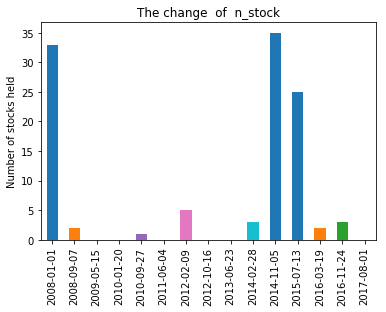

In [8]:
def music_strategy(data):
    
    # 計算 alpha beta (截點跟焦點)
    days = 800
    c = data.get('收盤價', days)
    
    # 請參考 https://zh.wikipedia.org/w/index.php?title=%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8
    # 中的單變量回歸

    y = c.iloc[-days:]
    x = pd.Series(list(range(days)), index=y.index)
    midy = y.mean(axis=0)
    midx = days/2

    beta = (y - midy).mul(x - midx, axis=0).sum()/((x-midx)**2).sum()
    alpha = midy - midx * beta


    # 計算中線跟標準差
    X = pd.DataFrame({k: x for k in beta.index})
    mid_line = ((X * beta + alpha))
    std = (y - mid_line).std()
    
    conditions = [
        (c.iloc[-1] < mid_line.iloc[-1] - 2*std),
        c.iloc[-1] > c.iloc[-20:].mean()
    ]
    
    selected_stock = sum(conditions) == len(conditions)
    
    return selected_stock[selected_stock]
    
from finlab.backtest import backtest
import datetime
start = datetime.date(2008, 1, 1)
end = datetime.date(2018, 1, 1)
data.cache=True
backtest(start, end, 250, music_strategy, data)

In [ ]:
from finlab.data import Data
data = Data()
# 先拿出計算市值需要用到的財務數據

股本 = data.get('股本合計', 1)
price = data.get('收盤價', 100)
# ----------- #
# 找出當天股價  #
# ----------- #

# 新版（較簡單）：將頻率為「天」的股價，reindex 成每「季」
# method='fill'是說，假如公佈財報那天沒有股價，則以時間往前最接近的那天為主。

#當天股價 = price.reindex(股本.index, method='ffill').iloc[-1]
當天股價 =price.iloc[-1]

# 原本（較難）：當天股價 = price.loc[:股本.index[0]].iloc[-1]

# ----------- #
# 找出當天股本  #
# ----------- #

當天股本 = 股本.iloc[-1]

# -----------  #
# 計算市值      #
# -----------  #

# 市值 = 總股數 * 股價
#     = （股本 * 1000） / 10 * 股價

市值 = 當天股本 * 1000 / 10 * 當天股價
市值['1101']


import pandas as pd

# 將每季累計的財務數據，轉換成單季
def toSeasonal(df):
    season4 = df[df.index.month == 3]
    season1 = df[df.index.month == 5]
    season2 = df[df.index.month == 8]
    season3 = df[df.index.month == 11]

    season1.index = season1.index.year
    season2.index = season2.index.year
    season3.index = season3.index.year
    season4.index = season4.index.year - 1

    newseason1 = season1
    newseason2 = season2 - season1.reindex_like(season2)
    newseason3 = season3 - season2.reindex_like(season3)
    newseason4 = season4 - season3.reindex_like(season4)

    newseason1.index = pd.to_datetime(newseason1.index.astype(str) + '-05-15')
    newseason2.index = pd.to_datetime(newseason2.index.astype(str) + '-08-14')
    newseason3.index = pd.to_datetime(newseason3.index.astype(str) + '-11-14')
    newseason4.index = pd.to_datetime((newseason4.index + 1).astype(str) + '-03-31')

    return newseason1.append(newseason2).append(newseason3).append(newseason4).sort_index()
    
# 計算自由現金流 = 營業活動之淨現金流入 - 投資活動之淨現金流出
投資現金流 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 8))
營業現金流 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 8))
自由現金流 = (投資現金流 + 營業現金流).iloc[-4:].sum()
自由現金流.describe()

稅後淨利 = data.get('本期淨利（淨損）', 1)

# 修正：因為有些股東權益的名稱叫作「權益總計」有些叫作「權益總額」，所以要先將這兩個dataframe合併起來喔！
權益總計 = data.get('權益總計', 1)
權益總額 = data.get('權益總額', 1)

# 把它們合併起來（將「權益總計」為NaN的部分填上「權益總額」）
權益總計.fillna(權益總額, inplace=True)

股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
股東權益報酬率.describe()


營業利益 = data.get('營業利益（損失）', 5)
營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
營業利益成長率.describe()

%matplotlib inline
當月營收 = data.get('當月營收', 4) * 1000
當季營收 = 當月營收.iloc[-4:].sum() # 取近4個月營收總和，當作一季的月營收（4也可以改變）
市值營收比 = 市值 / 當季營收
市值營收比.describe()

# current
流動資產 = data.get('流動資產合計',5)
流動負債 = data.get('流動負債合計',5)
current_ratio = 流動資產/流動負債
# liability
long_liability = data.get('非流動負債合計',5)
long_liability

#capital
stocks = data.get('普通股股本',5)
#inventory
control_season = 2
inventory = data.get('存貨合計',6)
asset = data.get('資產總計',6)
no_turnover = inventory/asset
turnover_ratio = 1 - no_turnover
turnover_growth_rate = (turnover_ratio.iloc[-control_season] /turnover_ratio.iloc[-control_season-4])



In [ ]:
def cash_strategy():
    